In [1]:
import sauna
import numpy as np

/home/exemplar/.local/lib/python3.8/site-packages/pandas/core/computation/expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [2]:
scale_sensitivities = sauna.Sensitivities()
scale_sensitivities.group_structure = sauna.GROUP_STRUCTURES['SCALE-56']
scale_sensitivities.from_scale('../models/MET1000_FC_NFP.2025.02.28T10.09.44.sdf', 'B', 'Eigenvalue')
#scale_sensitivities.to_excel('./scale_sensitivities.xlsx')

Number of profiles: 3832
Number of groups: 56
Program: kenovi
The data have been imported successfully.


In [3]:
sensitivities = sauna.Sensitivities()    
sensitivities.group_structure = sauna.GROUP_STRUCTURES['SCALE-56']
sensitivities.from_serpent('../models/MET1000_FC_56_sens0.m')
#sensitivities.to_excel('./serpent_sensitivities.xlsx')

INFO:  Reading ../models/MET1000_FC_56_sens0.m
INFO:    - done


The Serpent sensitivity file contains the following functionals: ['keff', 'beff', 'beffGroup1', 'beffGroup2', 'beffGroup3', 'beffGroup4', 'beffGroup5', 'beffGroup6', 'beffGroup7', 'beffGroup8', 'leff', 'lambda', 'lambdaGroup1', 'lambdaGroup2', 'lambdaGroup3', 'lambdaGroup4', 'lambdaGroup5', 'lambdaGroup6', 'lambdaGroup7', 'lambdaGroup8']


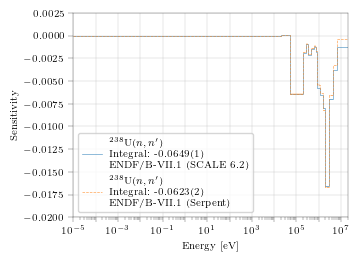

In [4]:
sensitivity_1 = scale_sensitivities.get_by_params('Eigenvalue', 922380, 4)
sensitivity_2 = sensitivities.get_by_params('Eigenvalue', 922380, 4)
senses = [sensitivity_1, sensitivity_2]

sauna.Plot.plot_sensitivity(senses, format = 'pdf', show_integral = True, normalization_type = 0, annotations = ['\nENDF/B-VII.1 (SCALE 6.2)', '\nENDF/B-VII.1 (Serpent)'])

In [ ]:
covariances = sauna.Covariances()
covariances.library = 'ENDF-B-VII.1'
covariances.group_structure = sauna.GROUP_STRUCTURES['SCALE-56']
covariances.folder = f'../../NuclearData/ENDF_Libraries/{covariances.library}/n'
covariances.from_endfs(extension='.dat', parallel=True)

-------------------------------
Processing ../../NuclearData/ENDF_Libraries/ENDF-B-VII.1/n/n_0125_1-H-1.dat
-------------------------------
-------------------------------
Processing -------------------------------../../NuclearData/ENDF_Libraries/ENDF-B-VII.1/n/n_3425_34-Se-74.dat--------------------------------------------------------------



-------------------------------Processing-------------------------------Processing
Processing   ../../NuclearData/ENDF_Libraries/ENDF-B-VII.1/n/n_3843_38-Sr-90.dat
../../NuclearData/ENDF_Libraries/ENDF-B-VII.1/n/n_3131_31-Ga-71.dat
Processing
-------------------------------../../NuclearData/ENDF_Libraries/ENDF-B-VII.1/n/n_0228_2-He-4.dat -------------------------------

../../NuclearData/ENDF_Libraries/ENDF-B-VII.1/n/n_3831_38-Sr-86.dat
-------------------------------

--------------------------------------------------------------

Processing------------------------------- 
../../NuclearData/ENDF_Libraries/ENDF-B-VII.1/n/n_3725_37-Rb-85.datProce

In [6]:
# ampx_path = '/home/exemplar/Neutronics/SCALE-6.2.4-Source/build/install/bin/AmpxCOVConverter'
# coverx_path = 'scale.rev08.56groupcov7.1'
# lib_name = 'SCALE-56'

# covariances_2 = pack.Covariances()
# covariances_2.library = lib_name
# covariances_2.group_structure = pack.GROUP_STRUCTURES[lib_name]
# covariances_2.from_coverx(ampx_path, coverx_path)

In [7]:
covariance_1 = covariances.get_by_params(922380, 922380, 18, 102)
covariance_2 = covariances.get_by_params(922380, 922380, 18, 18)
covariance_3 = covariances.get_by_params(922380, 922380, 102, 102)
covariance_4 = covariances.get_by_params(922380, 922380, 4, 4)

True


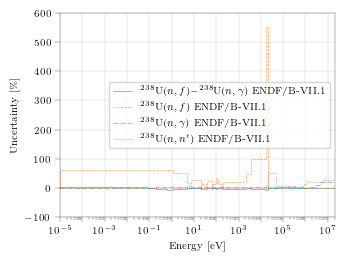

In [8]:
covs = [covariance_1, covariance_2, covariance_3, covariance_4]
sauna.Plot.plot_uncertainty(covs, format = 'pdf', annotations = [' ENDF/B-VII.1', ' ENDF/B-VII.1', ' ENDF/B-VII.1', ' ENDF/B-VII.1'])

/home/exemplar/.local/lib/python3.8/site-packages/sauna/plot.py:528: UserWarning: This figure was using a layout engine that is incompatible with subplots_adjust and/or tight_layout; not calling subplots_adjust.
  plt.subplots_adjust(bottom=0.2)


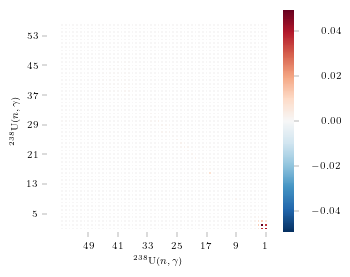

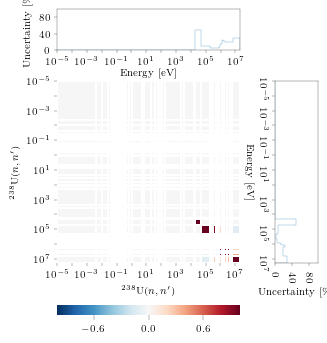

In [9]:
sauna.Plot.plot_cov(covariance_3, name='U238-102', format = 'pdf', tick_step = 8, type = 'matplotlib')
sauna.Plot.plot_cor(covariance_4, name='U238-4', format = 'pdf', tick_step = 8)

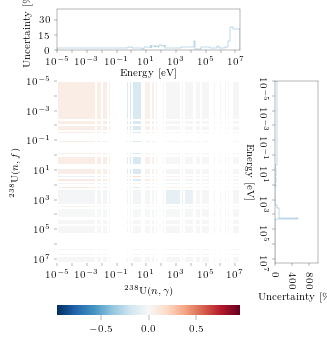

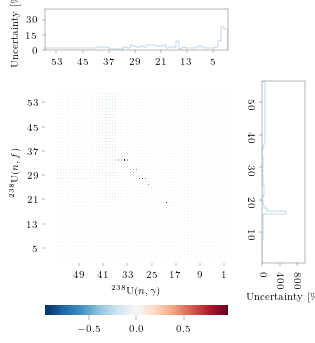

In [10]:
sauna.Plot.plot_cor(covariance_1,covariance_2, covariance_3, name='corr_en', format = 'pdf', plot_by = 'energy')
sauna.Plot.plot_cor(covariance_1,covariance_2, covariance_3, name='corr_gr', format = 'pdf', plot_by = 'group',  tick_step = 8)